In [1]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (+-) directory to store the data.
local_download_path = os.path.expanduser('/content')
try:
    os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1cIWiyhVvbCKO5uyPZTh_OU8j_zqXDYx8' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
    print('title: %s, id: %s' % (f['title'], f['id']))
    fname = os.path.join(local_download_path, f['title'])
    print('downloading to {}'.format(fname))
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile(fname)

    100% |████████████████████████████████| 993kB 19.0MB/s 

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

title: train_sample_EXPANDED.csv, id: 1lshF-PYa0OgNXbOnpIT-OvzoT3m3hJRs
downloading to /content/train_sample_EXPANDED.csv
title: crawl-300d-2M.vec, id: 1L5-dgbLGGntuRl0ndH5--XXKb_Vw7AeG
downloading to /content/crawl-300d-2M.vec
title: test_v5.csv, id: 1Ur54c1CdjD6L4E2nEisuVmS7mUJdB2Ot
downloading to /content/test_v5.csv
title: train_v5.csv, id: 19TCOZOYyyBrcvnz3dLQJFxKMDrWNe2k7
downloading to /content/train_v5.csv
title: valid_v5.csv, id: 1ubjQKgGY2gifsByYRHI40FB5fGEYgN90
downloading to /content/valid_v5.csv
title: business.csv, id: 1GMhZjlONfqGVbulMfW5JY91xk9vIcZ-A
downloading to /content/business.csv
title: frequency_dictionary_en_82_765_GLOVE.txt, id: 13oNGFUgpqGyqhQwPuYPgU5unwmzQUX8y
downloa

In [0]:
# import numpy as np
# import string
# import pandas as pd
# import nltk
# import keras
# import logging
# logging.getLogger('tensorflow').disabled = True
# import tensorflow as tf
# import os
# import io
# import math
# from google.colab import auth
# from googleapiclient.discovery import build
# from googleapiclient.http import MediaIoBaseDownload

# from sklearn import random_projection
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import normalize
# from nltk.corpus import stopwords, words

# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Embedding, Dense, Dropout, \
#     concatenate, Input, Bidirectional, GRU, TimeDistributed, \
#     Flatten, Layer, SpatialDropout1D, GaussianNoise
# # from tensorflow.keras.optimizers import SGD, RMSprop
# from tensorflow.keras import metrics
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# import tensorflow.keras.backend as K
# from tensorflow.train import RMSPropOptimizer
# from tensorflow.keras import regularizers
# import matplotlib.pyplot as plt
# import requests
# import gzip
# import time


# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('words')
# stop_words = set(stopwords.words('english') + list(string.punctuation))
# eng_words = words.words('en')
# auth.authenticate_user()
# drive_service = build('drive', 'v3')

# # https://drive.google.com/drive/folders/1cIWiyhVvbCKO5uyPZTh_OU8j_zqXDYx8?usp=sharing
# folder_id = '1cIWiyhVvbCKO5uyPZTh_OU8j_zqXDYx8'
# params = {}
# children = drive_service.files().list(q="'" + folder_id + "' in parents").execute()
# for child in children.get('files', []):
#     file_id = child['id']
#     request = drive_service.files().get_media(fileId=file_id)
#     fh = io.BytesIO()
#     downloader = MediaIoBaseDownload(fh, request)
#     done = False
#     while done is False:
#         try:
#             status, done = downloader.next_chunk()
#             # print("Download %d%%." % int(status.progress() * 100))
#         except:
#             break
#     if done == False:
#         continue
#     with open(child['name'], 'wb') as x:
#         x.write(fh.getvalue())
        
# print("Download Finished")

# # https://drive.google.com/file/d/1RSdlVsSX2dqfjrvBxspr7LW8kRdOSiGi/view?usp=sharing
# fastText_file_id = '1RSdlVsSX2dqfjrvBxspr7LW8kRdOSiGi'
# request = drive_service.files().get_media(fileId=fastText_file_id)
# fh = io.BytesIO()
# downloader = MediaIoBaseDownload(fh, request)
# done = False
# while done is False:
#     status, done = downloader.next_chunk()
# #     print("Download %d%%." % int(status.progress() * 100))

# with open('crawl-300d-2M.vec', 'wb') as x:
#     x.write(fh.getvalue())
    
# print("Download Finished")

In [3]:
import numpy as np
import string
import pandas as pd
import nltk
import keras
import logging
logging.getLogger('tensorflow').disabled = True
import tensorflow as tf
import os
import io
import math
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload

from sklearn import random_projection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from nltk.corpus import stopwords, words

from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras.layers import Embedding, Dense, Dropout, \
    concatenate, Input, Bidirectional, GRU, TimeDistributed, \
    Flatten, Layer, SpatialDropout1D, GaussianNoise
# from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow.keras.backend as K
from tensorflow.train import RMSPropOptimizer
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import requests
import gzip
import time

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
stop_words = set(stopwords.words('english') + list(string.punctuation))
eng_words = words.words('en')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [0]:
# -------------- Helper Functions --------------
def tokenize(text):
    '''
    :param text: a doc with multiple sentences, type: str
    return a word list, type: list
    https://textminingonline.com/dive-into-nltk-part-ii-sentence-tokenize-and-word-tokenize
    e.g.
    Input: 'It is a nice day. I am happy.'
    Output: ['it', 'is', 'a', 'nice', 'day', 'i', 'am', 'happy']
    '''
    tokens = []
    for word in keras.preprocessing.text.text_to_word_sequence(text):
        if word not in stop_words and not word.isnumeric():
            tokens.append(word)
    return tokens

def get_sequence(data, vocab_dict):
    '''
    :param data: a list of words, type: list
    :param seq_length: the length of sequences,, type: int
    :param vocab_dict: a dict from words to indices, type: dict
    return a dense sequence matrix whose elements are indices of words,
    '''
    data_matrix = np.zeros((len(data), MAX_SENT, MAX_SENT_LENGTH), dtype=int)
    for i, doc in enumerate(data):
        for j, sent in enumerate(doc):
            # YOUR CODE HERE
            if j == MAX_SENT:
                break
            for k, word in enumerate(tokenize(sent)):
                if k == MAX_SENT_LENGTH:
                    break
                word_idx = vocab_dict.get(word, 1) # 1 means the unknown word
                data_matrix[i, j, k] = word_idx
    return data_matrix

def read_data(file_name, vocab=None):
    """
    https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
    """
    df = pd.read_csv(file_name, encoding='utf-8', engine='python', dtype={ 'stars': np.float64, 'text': 'str', 'review_id': 'str' })
    df.dropna(inplace=True)
    df.drop(df.index[200000:], inplace=True)
    df['words'] = df['text'].apply(tokenize)
    df['sentences'] = df['text'].apply(nltk.tokenize.sent_tokenize)
    '''
    if file_name == 'train.csv':
        gen = parse('google-local-reviews.clean.json.gz')
        ADD_LEN = 50000
        additionals = []
        next_review_id = 0
        for newTD in gen:
            if ADD_LEN == 0:
                break
            if newTD['reviewText'] is None or newTD['reviewText'] == '':
                continue
            this_words = tokenize(newTD['reviewText'])
            if len(this_words) == 0:
                continue
            look_count = 10
            c_eng = 0
            for i in range(len(this_words)):
                if i >= look_count:
                    break
                if this_words[i] in eng_words:
                    c_eng += 1
            
            if c_eng / min(len(this_words), look_count) >= 0.8:
                additionals.append({'stars': newTD['rating'],
                                    'text': newTD['reviewText'],
                                    'words': this_words,
                                    'sentences': nltk.tokenize.sent_tokenize(newTD['reviewText']),
                                    'review_id': next_review_id })
                ADD_LEN -= 1
                next_review_id += 1
                
        df = df.append(additionals)
        df.index = [i for i in range(len(df))]
        df.to_csv('train_extended.csv', columns=['stars', 'text', 'review_id'])
    '''
            

    if vocab is None:
        vocab = set()
        for i in range(len(df)):
            for word in df.iloc[i]['words']:
                vocab.add(word)
    vocab_dict = dict()
    vocab_dict['<pad>'] = 0 # 0 means the padding signal
    vocab_dict['<unk>'] = 1 # 1 means the unknown word
    vocab_size = 2
    for v in vocab:
        vocab_dict[v] = vocab_size
        vocab_size += 1

    data_matrix = get_sequence(df['sentences'], vocab_dict)

    stars = df['stars'].apply(int) - 1
    
    if file_name == 'train_sample_EXPANDED.csv':
        fin = io.open('crawl-300d-2M.vec', 'r', encoding='utf-8', newline='\n', errors='ignore')
        n, d = map(int, fin.readline().split())
        fastText_embeddings = np.zeros((len(vocab_dict), embedding_size))
        for line in fin:
            tokens = line.rstrip().split(' ')
            if tokens[0].lower() in vocab_dict:
                fastText_embeddings[vocab_dict[tokens[0].lower()]] = list(map(float, tokens[1:]))
                del vocab_dict[tokens[0].lower()]
        fin.close()
    
#         data_matrix3 = df['s0']
#         for i in range(1, 8):
#             data_matrix3 = np.column_stack((data_matrix3, df['s'+str(i)]))
#         data_matrix3 = np.mean(data_matrix3, axis=1)
        
        dat = normalize(np.column_stack((df['cool'], df['funny'], df['useful'])))
        dat1 = df[['business_rcount']].values.astype(float)
        min_max_scaler = preprocessing.MinMaxScaler()
        dat1 = pd.DataFrame(min_max_scaler.fit_transform(dat1))

        return df['review_id'], stars, data_matrix, vocab, fastText_embeddings, \
            np.column_stack((dat, df['subjectivity'], df['polarity'], df['business_stars'], dat1))
    else:
#         data_matrix3 = df['s0']
#         for i in range(1, 8):
#             data_matrix3 = np.column_stack((data_matrix3, df['s'+str(i)]))
#         data_matrix3 = np.mean(data_matrix3, axis=1)
        
        dat = normalize(np.column_stack((df['cool'], df['funny'], df['useful'])))
        dat1 = df[['business_rcount']].values.astype(float)
        min_max_scaler = preprocessing.MinMaxScaler()
        dat1 = pd.DataFrame(min_max_scaler.fit_transform(dat1))

        return df['review_id'], stars, data_matrix, vocab, None, \
            np.column_stack((dat, df['subjectivity'], df['polarity'], df['business_stars'], dat1))
# ----------------- End of Helper Functions-----------------

def load_data():
    # Load training data and vocab
    train_id_list, train_data_label, train_data_matrix, vocab, fastText_embeddings, train_2 = read_data("train_sample_EXPANDED.csv")
    L = max(train_data_label)+1  # labels begin with 0

    # Load valid data
    valid_id_list, valid_data_label, valid_data_matrix, _, _, valid_2 = read_data("valid_v5.csv", vocab=vocab)

    # Load testing data
    test_id_list, test_data_label, test_data_matrix, _, _, test_2 = read_data("test_v5.csv", vocab=vocab)
    
    print("Vocabulary Size:", len(vocab))
    print("Training Set Size:", len(train_id_list))
    print("Training Set Shape:", train_data_matrix.shape)
    print("Validation Set Size:", len(valid_id_list))
    print("Validation Set Shape:", valid_data_matrix.shape)
    print("Test Set Size:", len(test_id_list))
    print("Test Set Shape:", test_data_matrix.shape)

    # Converts a class vector to binary class matrix.
    # https://keras.io/utils/#to_categorical
    train_data_label = keras.utils.to_categorical(train_data_label, num_classes=L)
    valid_data_label = keras.utils.to_categorical(valid_data_label, num_classes=L)
    test_data_label = keras.utils.to_categorical(test_data_label, num_classes=L)
    return train_id_list, train_data_matrix, train_data_label, \
        valid_id_list, valid_data_label, valid_data_matrix, \
        test_id_list, test_data_label, test_data_matrix, vocab, fastText_embeddings, \
        train_2, valid_2, test_2


In [22]:
# Hyperparameters
embedding_size = 300
hidden_size = 80
batch_size = 800
dropout_rate = 0.4
learning_rate = 0.0001
total_epoch = 40
MAX_SENT_LENGTH = 10
MAX_SENT = 10

start_time = time.time()
train_id_list, train_data_matrix, train_data_label, \
    valid_id_list, valid_data_label, valid_data_matrix, \
    test_id_list, test_data_label, test_data_matrix, \
    vocab, fastText_embeddings, train_2, valid_2, test_2 = load_data()
print("Data loaded in %f seconds" % (time.time() - start_time))

vocab_dict = dict()
vocab_dict['<pad>'] = 0 # 0 means the padding signal
vocab_dict['<unk>'] = 1 # 1 means the unknown word
vocab_size = 2
for v in vocab:
    vocab_dict[v] = vocab_size
    vocab_size += 1

fin = io.open('crawl-300d-2M.vec', 'r', encoding='utf-8', newline='\n', errors='ignore')
n, d = map(int, fin.readline().split())
fastText_embeddings = np.zeros((len(vocab_dict), embedding_size))
for line in fin:
    tokens = line.rstrip().split(' ')
    if tokens[0].lower() in vocab_dict:
        fastText_embeddings[vocab_dict[tokens[0].lower()]] = list(map(float, tokens[1:]))
fin.close()

# Data shape
N = train_data_matrix.shape[0]
L = train_data_label.shape[1]

input_size = len(vocab) + 2
output_size = L

# fastText_embeddings = normalize(fastText_embeddings)
# print(np.amax(fastText_embeddings))
# print(np.amin(fastText_embeddings))

# fastText_embeddings = ((fastText_embeddings - fastText_embeddings.min()) * (1 / (fastText_embeddings.max() - fastText_embeddings.min())))
assert not np.any(np.isnan(fastText_embeddings))
print(np.amax(fastText_embeddings))
print(np.amin(fastText_embeddings))

valid_data_label[0].shape



Vocabulary Size: 121922
Training Set Size: 200000
Training Set Shape: (200000, 10, 10)
Validation Set Size: 10000
Validation Set Shape: (10000, 10, 10)
Test Set Size: 10000
Test Set Shape: (10000, 10, 10)
Data loaded in 186.193316 seconds
3.4568
-2.8031


(5,)

In [0]:
# New model
def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatible with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)



class AttLayer(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Note: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = tf.keras.initializers.get('glorot_uniform')

        self.W_regularizer = keras.regularizers.get(W_regularizer)
        self.u_regularizer = keras.regularizers.get(u_regularizer)
        self.b_regularizer = keras.regularizers.get(b_regularizer)

        self.W_constraint = keras.constraints.get(W_constraint)
        self.u_constraint = keras.constraints.get(u_constraint)
        self.b_constraint = keras.constraints.get(b_constraint)

        self.bias = bias
        super(AttLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(int(input_shape[-1]), int(input_shape[-1]),),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight(shape=(int(input_shape[-1]),),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight(shape=(int(input_shape[-1]),),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttLayer, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

best ones:

dropout = 0.4

total_epoch = 15 - 20

learning_rate = 0.0005

batch_size = 200

hidden_unit dense = 200 with sigmoid with l2

In [24]:
dropout_rate = 0.4
total_epoch = 20
learning_rate = 0.0005
batch_size = 600
dense_size = 200

embedding_layer = Embedding(input_size, embedding_size,
                            input_length=MAX_SENT_LENGTH,
                            weights=[fastText_embeddings],
                            trainable=True)

sentence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sentence_input)
# noise = GaussianNoise(0.2)(embedded_sequences)
dr1 = SpatialDropout1D(dropout_rate)(embedded_sequences)
l_lstm = Bidirectional(GRU(hidden_size*3, return_sequences=True, activity_regularizer=regularizers.l2(0.01)))(dr1)
l_att = AttLayer(W_regularizer=regularizers.l2(0.01), u_regularizer=regularizers.l2(0.01))(l_lstm)
sentEncoder = Model(sentence_input, l_att)

review_input = Input(shape=(MAX_SENT, MAX_SENT_LENGTH), dtype='int32')
review_encoder = TimeDistributed(sentEncoder)(review_input)
dr2 = SpatialDropout1D(dropout_rate)(review_encoder)
l_lstm_sent = Bidirectional(GRU(hidden_size*3, return_sequences=True, activity_regularizer=regularizers.l2(0.01)))(dr2)
l_att_sent = AttLayer(W_regularizer=regularizers.l2(0.01), u_regularizer=regularizers.l2(0.01))(l_lstm_sent)
# dr3 = Dropout(dropout_rate)(l_att_sent)

aux_in = Input(shape=(7,), name='aux_in')
dense_in = concatenate([l_att_sent, aux_in])
x = Dense(dense_size, activation='sigmoid', activity_regularizer=l2(0.01))(dense_in)
x = Dropout(dropout_rate)(x)
x = Dense(dense_size, activation='sigmoid', activity_regularizer=l2(0.01))(x)
x = Dropout(dropout_rate)(x)

preds = Dense(L, activation='softmax')(x)
model = Model([review_input, aux_in], preds)

model.summary()

# SGD optimizer with momentum
# optimizer = SGD(lr=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)
optimizer = RMSPropOptimizer(learning_rate)

# reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=3, min_lr=0.000001, verbose=1, min_delta=0.005)
# compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

'''
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(
            tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)
'''
# training
# tpu_model.fit([train_data_matrix, train_data_matrix2], train_data_label, epochs=total_epoch, batch_size=batch_size, validation_data=([valid_data_matrix, valid_data_matrix2], valid_data_label))
history = model.fit([train_data_matrix, train_2], train_data_label, epochs=total_epoch, batch_size=batch_size, \
                    validation_data=([valid_data_matrix, valid_2], valid_data_label))

# testing
# train_score = model.evaluate([train_data_matrix, train_data_matrix2], train_data_label, batch_size=batch_size)
train_score = model.evaluate([train_data_matrix, train_2], train_data_label, batch_size=batch_size)
print('Training Loss: {}\n Training Accuracy: {}\n'.format(train_score[0], train_score[1]))
# valid_score = model.evaluate([valid_data_matrix, valid_data_matrix2], valid_data_label, batch_size=batch_size)
valid_score = model.evaluate([valid_data_matrix, valid_2], valid_data_label, batch_size=batch_size)
print('Validation Loss: {}\n Validation Accuracy: {}\n'.format(valid_score[0], valid_score[1]))

# predicting
test_pre = model.predict([test_data_matrix, test_2], batch_size=batch_size).argmax(axis=-1) + 1
sub_df = pd.DataFrame()
sub_df["review_id"] = test_id_list
sub_df["pre"] = test_pre
sub_df.to_csv("pre.csv", index=False)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 10, 10)       0                                            
__________________________________________________________________________________________________
time_distributed_4 (TimeDistrib (None, 10, 480)      37587600    input_10[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_9 (SpatialDro (None, 10, 480)      0           time_distributed_4[0][0]         
__________________________________________________________________________________________________
bidirectional_9 (Bidirectional) (None, 10, 480)      1038240     spatial_dropout1d_9[0][0]        
__________________________________________________________________________________________________
att_layer_

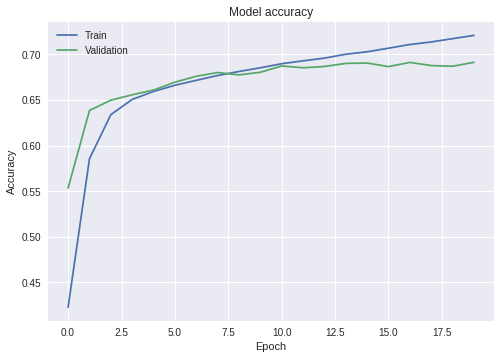

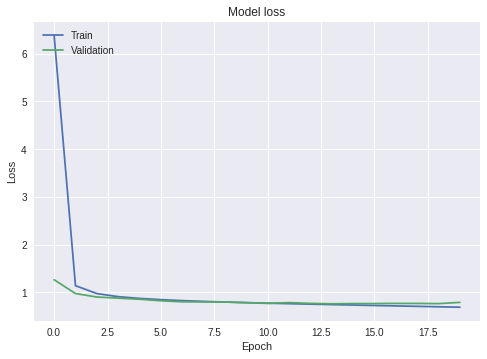

In [25]:
train_data_matrix.std()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
